In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

#import graphviz

In [ ]:
data = pd.read_csv('Datasets/car.data',
names=['buying','maint','doors','persons','lug_boot','safety','class1'],)
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class1
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class1      object
dtype: object

In [54]:
data.class1.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [55]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class1      0
dtype: int64

In [56]:
data.shape

(1728, 7)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class1      1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [58]:
data['class1'],class_names = pd.factorize(data['class1'])

In [59]:
print(class_names)

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')


In [60]:
print(data['class1'].unique())

[0 1 2 3]


In [61]:
data['buying'],_ = pd.factorize(data['buying'])

In [62]:
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])

In [63]:
data.head(10)

,buying,maint,doors,persons,lug_boot,safety,class1
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class1      1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


In [65]:
#DATA PREPN
X = data.iloc[:,:-1]

In [66]:
y = data.iloc[:,-1]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


In [68]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)

In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [70]:
y_pred = dtree.predict(X_test)
len(y_pred)

432

In [71]:

count_misclassified = (y_test != y_pred).sum()

In [72]:
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 12


In [73]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [74]:
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.97


In [75]:
dtree.predict([[2,1,0,1,0,2]])

array([1])

[Text(112.871,215.088,'X[5] <= 0.5\nentropy = 1.191\nsamples = 1296\nvalue = [914, 285, 49, 48]'),
 Text(107.769,196.385,'entropy = 0.0\nsamples = 446\nvalue = [446, 0, 0, 0]'),
 Text(117.972,196.385,'X[3] <= 0.5\nentropy = 1.474\nsamples = 850\nvalue = [468, 285, 49, 48]'),
 Text(112.871,177.682,'entropy = 0.0\nsamples = 286\nvalue = [286, 0, 0, 0]'),
 Text(123.074,177.682,'X[0] <= 1.5\nentropy = 1.633\nsamples = 564\nvalue = [182, 285, 49, 48]'),
 Text(40.8119,158.978,'X[1] <= 0.5\nentropy = 1.0\nsamples = 290\nvalue = [148, 142, 0, 0]'),
 Text(35.7104,140.275,'entropy = 0.0\nsamples = 66\nvalue = [66, 0, 0, 0]'),
 Text(45.9134,140.275,'X[4] <= 0.5\nentropy = 0.948\nsamples = 224\nvalue = [82, 142, 0, 0]'),
 Text(20.406,121.572,'X[5] <= 1.5\nentropy = 0.927\nsamples = 73\nvalue = [48, 25, 0, 0]'),
 Text(15.3045,102.868,'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0, 0]'),
 Text(25.5075,102.868,'X[1] <= 1.5\nentropy = 0.909\nsamples = 37\nvalue = [12, 25, 0, 0]'),
 Text(10.203,84.165

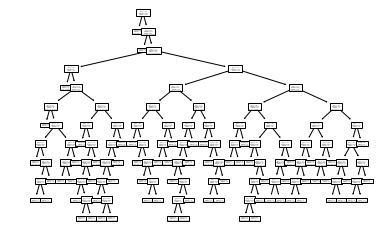

In [76]:
tree.plot_tree(dtree)

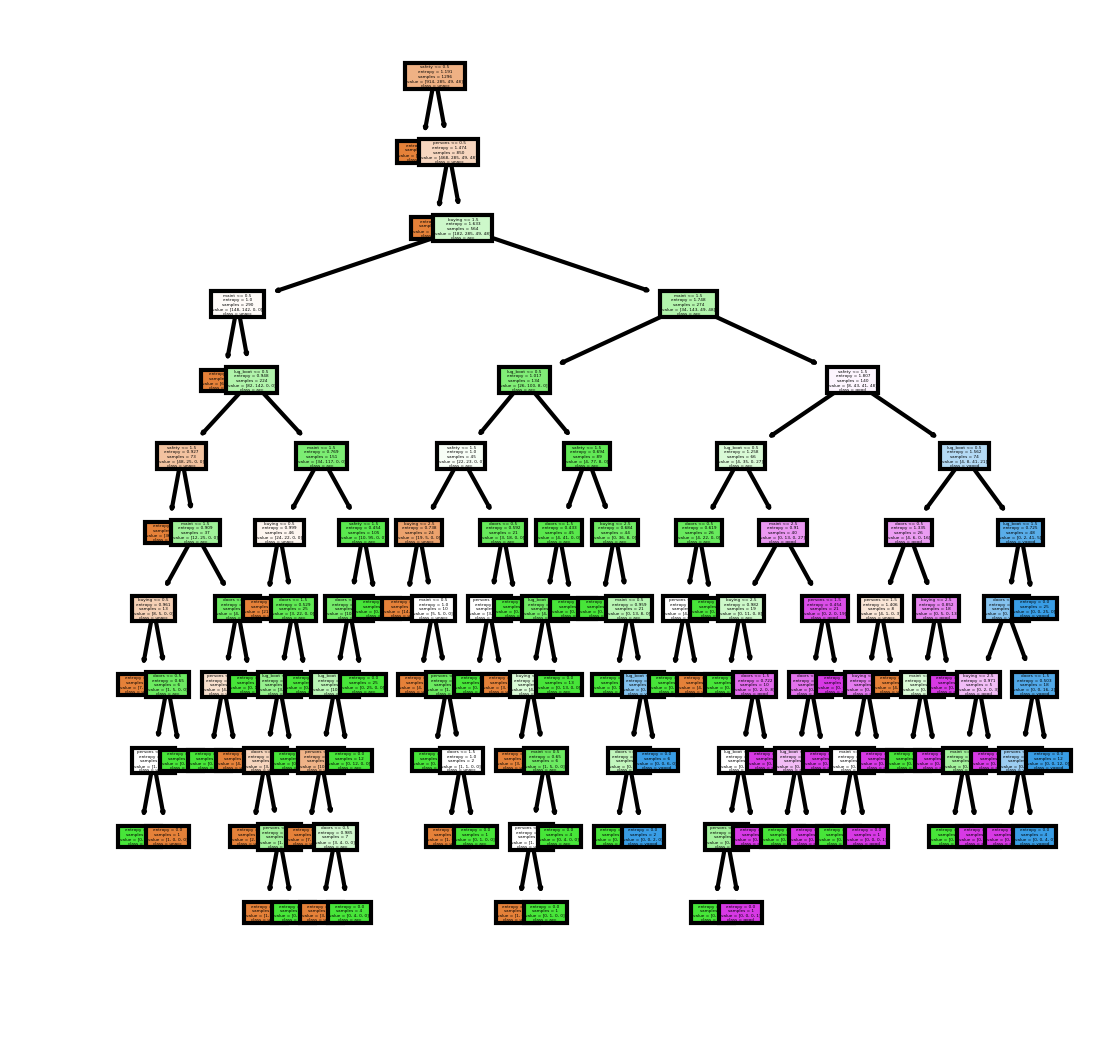

In [77]:
fn=['buying','maint','doors','persons','lug_boot','safety']
cn=['unacc', 'acc', 'vgood', 'good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')